
### Graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fake_path = '/content/drive/My Drive/Colab Notebooks/Truth Seeker Dataset/Fake.csv'
true_path = '/content/drive/My Drive/Colab Notebooks/Truth Seeker Dataset/True.csv'

fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [3]:
combined_data = pd.concat([fake_df, true_df])

In [4]:
combined_data['Word Count'] = combined_data['text'].str.split().str.len()

In [5]:
print(combined_data['Word Count'].describe())

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: Word Count, dtype: float64


In [6]:
combined_data.head()

,title,text,subject,date,Word Count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",495
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",305
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",580
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",444
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",420


In [7]:
# Calculate mean word count
mean_word_count = combined_data['Word Count'].mean()

# Calculate median word count
median_word_count = combined_data['Word Count'].median()

# Calculate standard deviation of word count
std_word_count = combined_data['Word Count'].std()

# Display results
print(f"Mean Word Count: {mean_word_count}")
print(f"Median Word Count: {median_word_count}")
print(f"Standard Deviation of Word Count: {std_word_count}")

Mean Word Count: 405.28228428883244
Median Word Count: 362.0
Standard Deviation of Word Count: 351.265594883484


In [8]:
# Count of articles per subject
subject_counts = combined_data['subject'].value_counts()

# Display subject counts
print(subject_counts)

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [9]:
# Correlation matrix
corr_matrix = combined_data[['Word Count']].corr()
print(corr_matrix)

            Word Count
Word Count         1.0


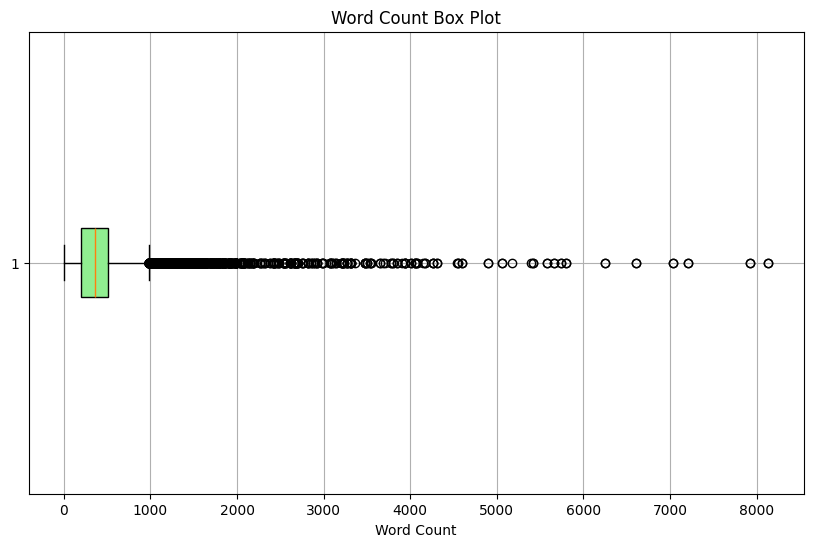

In [10]:
# Plotting a Box Plot for Word Count
plt.figure(figsize=(10, 6))
plt.boxplot(combined_data['Word Count'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Word Count Box Plot')
plt.xlabel('Word Count')
plt.grid(True)
plt.show()


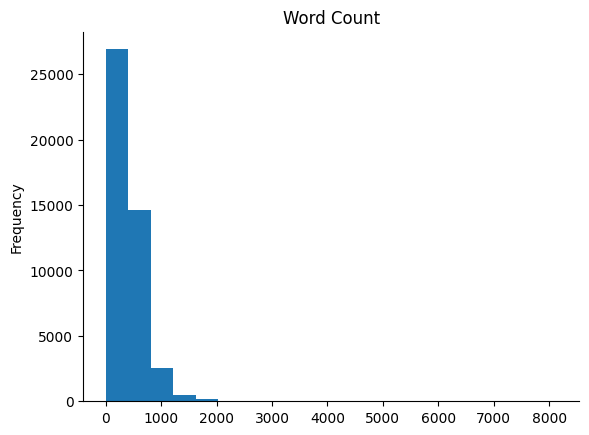

In [11]:
from matplotlib import pyplot as plt
combined_data['Word Count'].plot(kind='hist', bins=20, title='Word Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

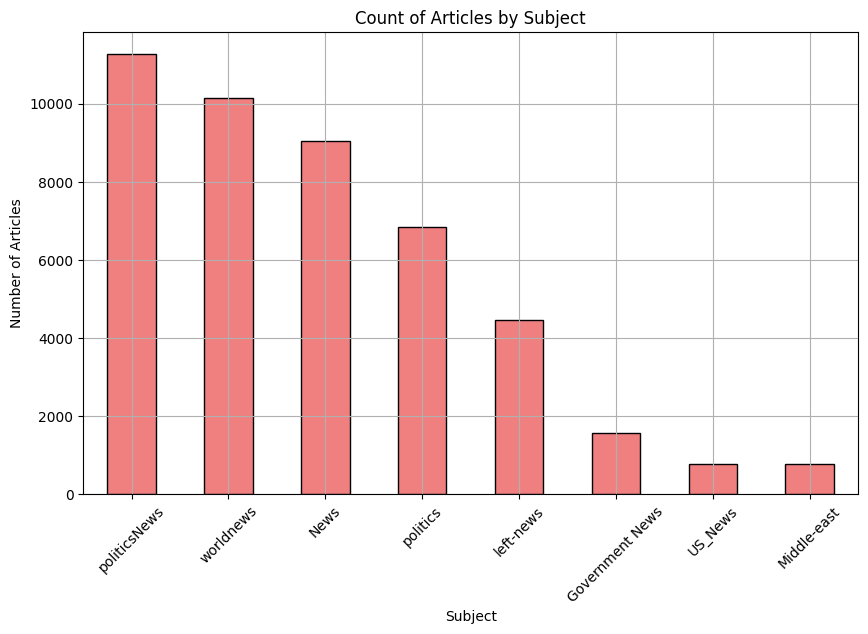

In [12]:
# Plotting Bar Plot for Articles by Subject
subject_counts = combined_data['subject'].value_counts()

plt.figure(figsize=(10, 6))
subject_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Count of Articles by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


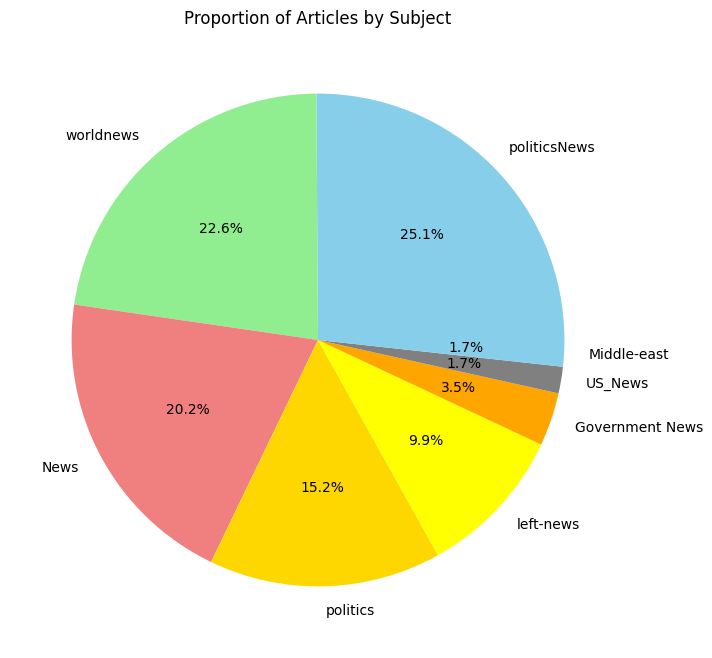

In [13]:
# Plotting Pie Chart for Proportion of Articles by Subject
subject_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'yellow', 'orange', 'grey'])
plt.title('Proportion of Articles by Subject')
plt.ylabel('')  # To remove the ylabel as it's not needed
plt.show()

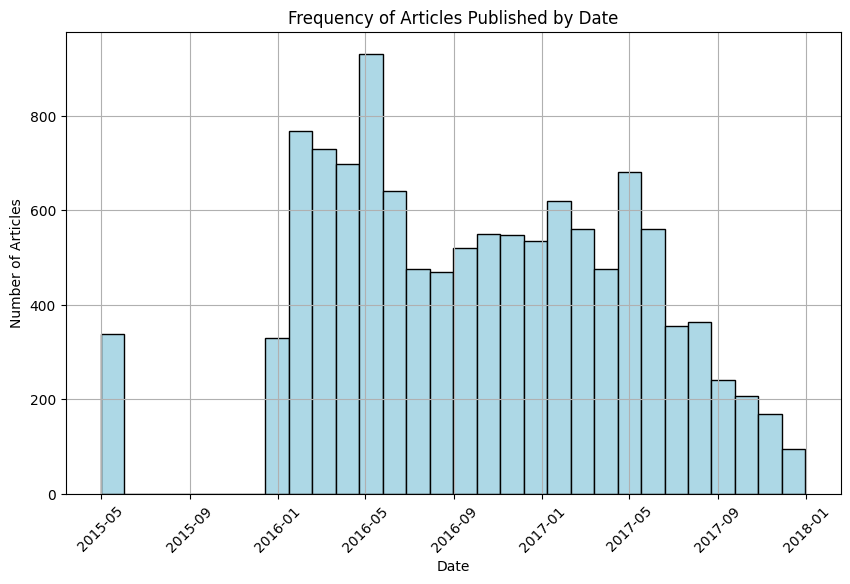

In [14]:
# Plotting Histogram for Articles Published by Date
combined_data['date'] = pd.to_datetime(combined_data['date'], errors='coerce')
plt.figure(figsize=(10, 6))
combined_data['date'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title('Frequency of Articles Published by Date')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

### Pre-Processing

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [25]:
# Function to clean text (renamed to avoid conflict)
def process_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [26]:
# Function to clean text by removing stop words and lemmatizing
def remove_stopwords_lemmatize(text):
    if not isinstance(text, str):
        return ""
    return ' '.join(
        lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in stop_words
    )